## Regresión Lineal Múltiple
##### Autor: Jose Luis Milan

#### Paso 0: Importar los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-bright')


df = pd.read_csv('..\data\Student_performance.csv')


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jluis\AppData\Local\Temp\ipykernel_9612\2325757967.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Student_performance.csv')


#### Entender los datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [5]:
df.shape

(10000, 6)

#### Preparación de los datos

In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({"Yes" : 1, "No" : 0})

C:\Users\jluis\AppData\Local\Temp\ipykernel_9612\3809647427.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({"Yes" : 1, "No" : 0})


In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


#### Análisis exploratorio de los datos

In [13]:
corr = df.corr()

<Axes: >

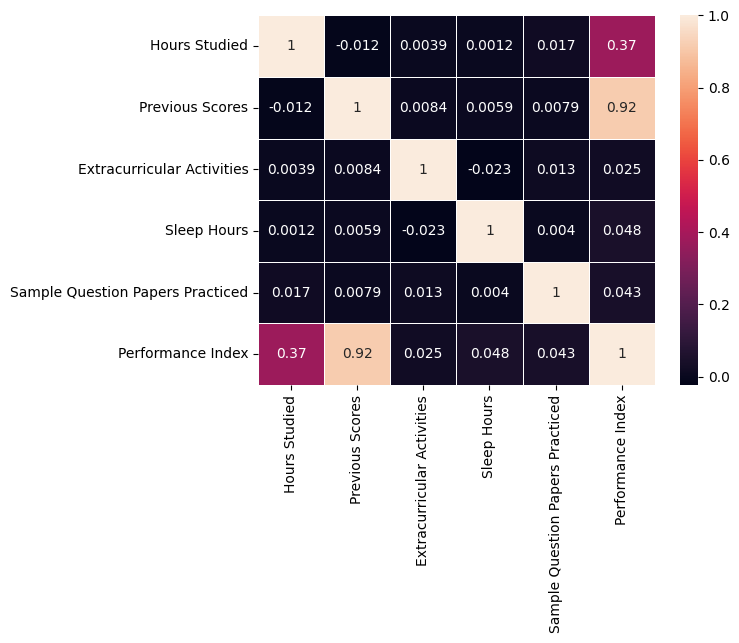

In [14]:
sns.heatmap(corr, annot=True, linewidth=0.5)

Observamos que en la matriz de correlación todas las variables independientes tienen una correlacion positiva con nuestra variable objetivo, en unos caso es mas fuerte como lo es con Previous Scores. Asi que usaremos 5 variables independientes y 1 variable dependiente para nuestro modelo de regresión lineal múltiple.

#### Implementación del modelo en Python

In [15]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

x = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced' ]]
y = df['Performance Index']

#Dividir los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Definir el modelo de regresion lineal multiple
mlr = LinearRegression()

#Entrenar el modelo
mlr.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Predecir con los datos de prueba
y_pred = mlr.predict(x_test)

In [25]:
#Evaluar el performance del modelo

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Error R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')


Error R^2: 0.9889832909573145
MAE: 1.6111213463123044
MSE: 4.082628398521853
